In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df_meta = pd.read_csv('../../our_data/meta_data.csv', index_col=0)
df_bac = pd.read_csv('../../our_data/16S_absolute_abundance_species.csv', index_col=0)
df_bac_tmp = df_bac[['Ruminococcus-sp.-N15.MGS-57','Lachnospiraceae-NK4A136-group','Faecalibaculum','Lachnospiraceae-bacterium-10-1','Clostridia-UCG-014']]
df_bac_tmp['sum'] = df_bac_tmp.sum(axis=1).to_frame()
df_bac_tmp['Muribaculaceae'] = df_bac['Muribaculaceae']
df_bac_tmp = np.log10(df_bac_tmp+1)
df = pd.merge(df_meta, df_bac_tmp,left_index=True, right_index=True, how='inner')
df.head()

<ipython-input-30-8bcad4be34ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bac_tmp['sum'] = df_bac_tmp.sum(axis=1).to_frame()
<ipython-input-30-8bcad4be34ef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bac_tmp['Muribaculaceae'] = df_bac['Muribaculaceae']


,MiceID,Vendor,Day,Diet,RandomizedGroup,Ruminococcus-sp.-N15.MGS-57,Lachnospiraceae-NK4A136-group,Faecalibaculum,Lachnospiraceae-bacterium-10-1,Clostridia-UCG-014,sum,Muribaculaceae
SampleID,,,,,,,,,,,,
sample131,BC1,Beijing,0,Control,C,3.851427,6.434564,7.337512,5.829090,5.231579,7.403547,7.338239
sample132,BC2,Beijing,0,Control,B,4.000604,6.570679,7.238789,4.954808,4.856801,7.326803,7.404803
sample133,BC3,Beijing,0,Control,A,3.683373,5.866553,7.096968,4.336515,4.743988,7.124475,7.139846
sample134,BC4,Beijing,0,Control,D,4.337481,6.614994,7.395203,5.709145,4.842617,7.470808,7.587458
sample135,BC5,Beijing,0,Control,E,0.000000,6.039411,7.286738,4.627113,5.727160,7.322704,7.299767


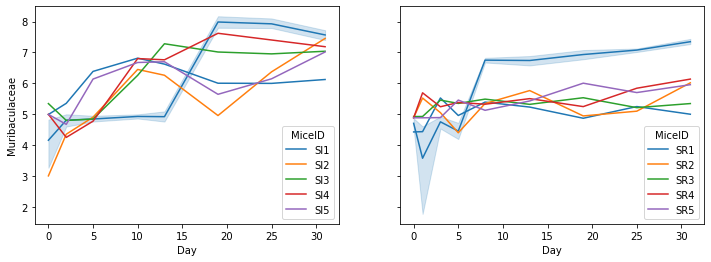

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharex=True, sharey=True)

for k,diet in enumerate(['Inulin','Resistant starch']):
    df_tmp = df[(df.Diet==diet)&(df.Vendor=='Shanghai')]
    _ = sns.lineplot(x='Day', y='Muribaculaceae', data=df_tmp, ax=ax[k])
    _ = sns.lineplot(x='Day', y='Clostridia-UCG-014', hue='MiceID', data=df_tmp, ax=ax[k])
#     for inhibitor in ['Muribaculaceae','Ruminococcus-sp.-N15.MGS-57','Lachnospiraceae-NK4A136-group','Faecalibaculum','Lachnospiraceae-bacterium-10-1','Clostridia-UCG-014']:   
#         _ = sns.lineplot(x='Day', y=inhibitor, data=df_tmp, ax=ax[k], label=inhibitor)